In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

In [22]:
df = pd.read_csv('/Users/Wilson//CS4661/Labs/Datasets/Healthcare/train_data_dictionary.csv')
df2 = pd.read_csv('/Users/Wilson//CS4661/Labs/Datasets/Healthcare/sample_sub.csv')
df

,Column,Description
0,case_id,Case_ID registered in Hospital
1,Hospital_code,Unique code for the Hospital
2,Hospital_type_code,Unique code for the type of Hospital
3,City_Code_Hospital,City Code of the Hospital
4,Hospital_region_code,Region Code of the Hospital
5,Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
6,Department,Department overlooking the case
7,Ward_Type,Code for the Ward type
8,Ward_Facility_Code,Code for the Ward Facility
9,Bed Grade,Condition of Bed in the Ward


In [23]:
df_test = pd.read_csv('/Users/Wilson//CS4661/Labs/Datasets/Healthcare/test_data.csv')
df_train = pd.read_csv('/Users/Wilson//CS4661/Labs/Datasets/Healthcare/train_data.csv')

In [24]:
df_train.head(20)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


In [25]:
df_test.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0
5,318444,23,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,2,71-80,4659.0
6,318445,26,b,2,Y,2,gynecology,Q,D,2.0,17006,2.0,Trauma,Moderate,2,71-80,4167.0
7,318446,25,e,1,X,4,gynecology,S,E,3.0,95946,NaN,Emergency,Moderate,2,31-40,4396.0
8,318447,23,a,6,X,4,gynecology,Q,F,3.0,95946,NaN,Trauma,Moderate,2,31-40,4088.0
9,318448,23,a,6,X,3,gynecology,Q,F,4.0,95946,NaN,Urgent,Moderate,2,31-40,3925.0


In [26]:
def normalize(df):
    labelencoder = LabelEncoder()
    
    # df['Hospital_region_code'] = labelencoder.fit_transform(df['Hospital_region_code'])
    # df['Ward_Type'] = labelencoder.fit_transform(df['Ward_Type'])
    # df['Ward_Facility_Code'] = labelencoder.fit_transform(df['Ward_Facility_Code'])

    # It seems that the code below does the same as above, so I did some replacements
    df['Bed Grade'] = labelencoder.fit_transform(df['Bed Grade'])

    # Minor is 0, Moderate is 1, and Extreme is 2
    soi = df['Severity of Illness'].unique()
    soi2 = [2,1,0]
    new_soi = dict(zip(soi, soi2))
    df['Severity of Illness'].replace(new_soi, inplace=True)

    df['Age'] = labelencoder.fit_transform(df['Age'])
    
    df['Hospital_type_code'] = labelencoder.fit_transform(df['Hospital_type_code'])
    

In [27]:
df_train = pd.concat([df_train,pd.get_dummies(df_train['Department'], 
            prefix='Department')], axis=1).drop(['Department'],axis=1)
df_train.reset_index(drop=True, inplace=True)

df_train = pd.concat([df_train,pd.get_dummies(df_train['Type of Admission'], 
                prefix='Admission')], axis=1).drop(['Type of Admission'],axis=1)
df_train.reset_index(drop=True, inplace=True)

# df_test = pd.concat([df_test,pd.get_dummies(df_test['Department'], 
#             prefix='Department')], axis=1).drop(['Department'],axis=1)
# df_test.reset_index(drop=True, inplace=True)

# df_test = pd.concat([df_test,pd.get_dummies(df_test['Type of Admission'], 
#                 prefix='Admission')], axis=1).drop(['Type of Admission'],axis=1)
# df_test.reset_index(drop=True, inplace=True)

In [28]:
normalize(df_test)
normalize(df_train)

In [30]:
labelencoder = LabelEncoder()
df_train['Stay'] = labelencoder.fit_transform(df_train['Stay'])

In [31]:
df_train.head(40)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,...,Admission_Deposit,Stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Admission_Emergency,Admission_Trauma,Admission_Urgent
0,1,8,2,3,Z,3,R,F,1,31397,...,4911.0,0,0,0,0,1,0,1,0,0
1,2,2,2,5,Z,2,S,F,1,31397,...,5954.0,4,0,0,0,1,0,0,1,0
2,3,10,4,1,X,2,S,E,1,31397,...,4745.0,3,0,1,0,0,0,0,1,0
3,4,26,1,2,Y,2,R,D,1,31397,...,7272.0,4,0,0,0,1,0,0,1,0
4,5,26,1,2,Y,2,S,D,1,31397,...,5558.0,4,0,0,0,1,0,0,1,0
5,6,23,0,6,X,2,S,F,1,31397,...,4449.0,1,0,1,0,0,0,0,1,0
6,7,32,5,9,Y,1,S,B,2,31397,...,6167.0,0,0,0,0,1,0,1,0,0
7,8,23,0,6,X,4,Q,F,2,31397,...,5571.0,4,0,0,0,1,0,0,1,0
8,9,1,3,10,Y,2,R,B,3,31397,...,7223.0,5,0,0,1,0,0,0,1,0
9,10,10,4,1,X,2,S,E,2,31397,...,6056.0,3,0,0,1,0,0,0,1,0


# Age

In [32]:
features = ['Age']
X = df_train[features]
y = df_train['Stay']
X

,Age
0,5
1,5
2,5
3,5
4,5
...,...
318433,4
318434,8
318435,7
318436,1


In [33]:
rand_forest_reg = RandomForestRegressor()
mse_list = cross_val_score(rand_forest_reg, X, y, cv=10, scoring='neg_mean_squared_error')

print(mse_list)
print()

mse_list_positive = -mse_list

# using numpy sqrt function to calculate rmse:
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print()

print(rmse_list.mean())

[-4.62953572 -4.54666861 -4.42220889 -4.84564367 -5.05297897 -4.33395159
 -4.61561205 -4.81774525 -4.4698993  -4.1076212 ]

[2.15163559 2.13229187 2.10290487 2.20128228 2.24788322 2.08181449
 2.14839755 2.19493627 2.11421364 2.02672672]

2.1402086505640017


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=7505, random_state=500)
rand_forest = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'sqrt', random_state=500)
rand_forest.fit(X_train, y_train)
y_predict = rand_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print(accuracy)

0.28127914723517655


In [37]:
rand_forest = RandomForestClassifier(n_estimators=100, bootstrap = True, random_state=500)

accuracy_list = cross_val_score(rand_forest, X, y, cv=10, scoring='accuracy')

print(accuracy_list)
print()

accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

[0.27600176 0.27813717 0.27659842 0.28017837 0.27323829 0.28156011
 0.27870242 0.28325587 0.28235405 0.28003015]

0.27900566004332833


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=7505, random_state=500)
k = 5000
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

print(accuracy)

0.2770153231179214


In [92]:
my_logreg = LogisticRegression(max_iter = 20000)

accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')

print(accuracy_list)
print()

accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

[0.27600176 0.27813717 0.27659842 0.28017837 0.27782314 0.28156011
 0.27870242 0.28325587 0.28235405 0.28003015]

0.2794641451582637


In [93]:
my_decisiontree = DecisionTreeClassifier()

accuracy_list = cross_val_score(my_decisiontree, X, y, cv=10, scoring='accuracy')

print(accuracy_list)
print()

accuracy_cv_2 = accuracy_list.mean()

print(accuracy_cv_2)

[0.27600176 0.27813717 0.27659842 0.28017837 0.27323829 0.28156011
 0.27870242 0.28325587 0.28235405 0.28003015]

0.27900566004332833


In [95]:
my_linreg = LinearRegression()

mse_list = cross_val_score(my_linreg, X, y, cv=10, scoring='neg_mean_squared_error')

print(mse_list)
print()

mse_list_positive = -mse_list

# using numpy sqrt function to calculate rmse:
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print()

print(rmse_list.mean())

[-4.62858378 -4.5507357  -4.42757123 -4.84840317 -5.04753513 -4.33940741
 -4.61754834 -4.81849837 -4.47460217 -4.10657642]

[2.15141437 2.13324534 2.10417947 2.20190898 2.24667201 2.08312444
 2.14884814 2.19510783 2.11532555 2.02646895]

2.1406295081629265


# Age, Bed Grade, and Severity

In [38]:
features = ['Age','Bed Grade','Available Extra Rooms in Hospital','Severity of Illness']
X = df_train[features]
y = df_train['Stay']
X

,Age,Bed Grade,Available Extra Rooms in Hospital,Severity of Illness
0,5,1,3,2
1,5,1,2,2
2,5,1,2,2
3,5,1,2,2
4,5,1,2,2
...,...,...,...,...
318433,4,3,3,1
318434,8,3,2,1
318435,7,3,3,0
318436,1,2,3,0


In [39]:
rand_forest_reg = RandomForestRegressor()
mse_list = cross_val_score(rand_forest_reg, X, y, cv=10, scoring='neg_mean_squared_error')

print(mse_list)
print()

mse_list_positive = -mse_list

# using numpy sqrt function to calculate rmse:
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print()

print(rmse_list.mean())

[-4.47267374 -4.40835842 -4.29941052 -4.69555368 -4.91254004 -4.19392027
 -4.44043106 -4.63049237 -4.29594203 -3.90819135]

[2.11486967 2.09960911 2.07350199 2.16692263 2.21642506 2.04790631
 2.10723303 2.15185789 2.07266544 1.9769146 ]

2.102790574541643


In [42]:
rand_forest = RandomForestClassifier(n_estimators=100, bootstrap = True, random_state = 500)

accuracy_list = cross_val_score(rand_forest, X, y, cv=10, scoring='accuracy')

print(accuracy_list)
print()

accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

[0.29704183 0.30944605 0.3008102  0.31962065 0.29176611 0.30859817
 0.30241176 0.30982289 0.29689414 0.2842697 ]

0.3020681483602407


In [43]:
my_logreg = LogisticRegression(max_iter = 50000)

accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')

print(accuracy_list)
print()

accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

[0.29299083 0.30037056 0.290667   0.31029393 0.2875581  0.30156387
 0.2997739  0.30473559 0.29871557 0.29001664]

0.297668599209325


In [44]:
my_decisiontree = DecisionTreeClassifier()

accuracy_list = cross_val_score(my_decisiontree, X, y, cv=10, scoring='accuracy')

print(accuracy_list)
print()

accuracy_cv_2 = accuracy_list.mean()

print(accuracy_cv_2)

[0.29707323 0.30900641 0.3007788  0.31883557 0.29208014 0.30840975
 0.30209773 0.31016832 0.29720818 0.28392425]

0.301958237446398


In [45]:
my_linreg = LinearRegression()

mse_list = cross_val_score(my_linreg, X, y, cv=10, scoring='neg_mean_squared_error')

print(mse_list)
print()

mse_list_positive = -mse_list

# using numpy sqrt function to calculate rmse:
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print()

print(rmse_list.mean())

[-4.50377669 -4.44134597 -4.33913794 -4.72403683 -4.94524523 -4.22975848
 -4.4790024  -4.68780596 -4.34038777 -3.93778906]

[2.12221033 2.10745011 2.08305976 2.17348495 2.22379074 2.05663766
 2.11636538 2.16513417 2.08335973 1.98438632]

2.11158791409828


# Age and OHE

In [46]:
features = ['Age','Bed Grade','Severity of Illness','Available Extra Rooms in Hospital',
            'Department_TB & Chest disease','Department_anesthesia','Department_gynecology',
            'Department_radiotherapy','Department_surgery','Admission_Emergency','Admission_Trauma','Admission_Urgent']

X = df_train[features]
y = df_train['Stay']
X

,Age,Bed Grade,Severity of Illness,Available Extra Rooms in Hospital,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Department_surgery,Admission_Emergency,Admission_Trauma,Admission_Urgent
0,5,1,2,3,0,0,0,1,0,1,0,0
1,5,1,2,2,0,0,0,1,0,0,1,0
2,5,1,2,2,0,1,0,0,0,0,1,0
3,5,1,2,2,0,0,0,1,0,0,1,0
4,5,1,2,2,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
318433,4,3,1,3,0,0,0,1,0,1,0,0
318434,8,3,1,2,0,1,0,0,0,0,0,1
318435,7,3,0,3,0,0,1,0,0,1,0,0
318436,1,2,0,3,0,1,0,0,0,0,1,0


In [47]:
rand_forest_reg = RandomForestRegressor()
mse_list = cross_val_score(rand_forest_reg, X, y, cv=10, scoring='neg_mean_squared_error')

print(mse_list)
print()

mse_list_positive = -mse_list

# using numpy sqrt function to calculate rmse:
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print()

print(rmse_list.mean())

[-4.51615059 -4.44222554 -4.33732012 -4.72897841 -4.95635694 -4.22161196
 -4.45882324 -4.66241384 -4.31002238 -3.9468707 ]

[2.12512366 2.10765878 2.08262337 2.17462144 2.2262877  2.05465617
 2.11159258 2.15926234 2.07605934 1.98667327]

2.1104558663523356


In [48]:
rand_forest = RandomForestClassifier(n_estimators=100, bootstrap = True)

accuracy_list = cross_val_score(rand_forest, X, y, cv=10, scoring='accuracy')

print(accuracy_list)
print()

accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

[0.29283381 0.30024494 0.29701043 0.30668258 0.28736968 0.30439015
 0.29996232 0.3028514  0.29331407 0.27783186]

0.2962491243120674


In [50]:
my_logreg = LogisticRegression(max_iter = 50000)

accuracy_list = cross_val_score(my_logreg, X, y, cv=10, scoring='accuracy')

print(accuracy_list)
print()

accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

[0.2957543  0.30128125 0.29446678 0.30658837 0.28799774 0.30153247
 0.29757568 0.3048298  0.29984612 0.28998524]

0.29798577387061964


In [49]:
my_decisiontree = DecisionTreeClassifier()

accuracy_list = cross_val_score(my_decisiontree, X, y, cv=10, scoring='accuracy')

print(accuracy_list)
print()

accuracy_cv_2 = accuracy_list.mean()

print(accuracy_cv_2)

[0.29424695 0.30093581 0.29785831 0.30715362 0.28784072 0.30445296
 0.29964829 0.30325964 0.29133562 0.27688974]

0.2963621662647772


In [51]:
my_linreg = LinearRegression()

mse_list = cross_val_score(my_linreg, X, y, cv=10, scoring='neg_mean_squared_error')

print(mse_list)
print()

mse_list_positive = -mse_list

# using numpy sqrt function to calculate rmse:
rmse_list = np.sqrt(mse_list_positive)
print(rmse_list)
print()

print(rmse_list.mean())

[-4.46774075 -4.39639107 -4.30388736 -4.68921108 -4.90038147 -4.19976089
 -4.43614394 -4.63828425 -4.29580345 -3.88124484]

[2.11370309 2.09675727 2.07458125 2.16545863 2.21368053 2.04933182
 2.10621555 2.15366763 2.07263201 1.97008752]

2.101611529328196


# Mat plot

<function matplotlib.pyplot.show(*args, **kw)>

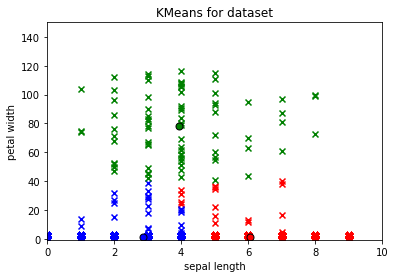

In [20]:
%matplotlib inline

features = features = ['Age','Bed Grade','Severity of Illness']

X = df_train[features]

# Clustering:
my_KMeans = KMeans(n_clusters=3)
my_KMeans.fit(X)

# Assigned Labels after clustering: 
labels = my_KMeans.labels_

# Centers of the clusters:
centers = my_KMeans.cluster_centers_

# Plotting the results:
plt.figure

for l, c in zip([0,1,2], ['red', 'blue', 'green']):
    
    current_members = (labels == l)
    current_center = centers[l]
    
    plt.scatter(X.iloc[current_members,0], X.iloc[current_members,1], color = c, marker='x')
    
    plt.plot(current_center[0], current_center[1], 'o', markerfacecolor = c,
            markeredgecolor = 'k', markersize=7)

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([0, 10])
plt.ylim([-0.5, 150])

# Labels, Title, Legend:
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.title('KMeans for dataset')

plt.show